# Cell phone validation

In [43]:
brand_dict={
    '360': '360', 
    '8848': '8848', 
    'AGM': 'AGM', 
    '谷歌': 'Google', 
    '长虹': 'Changhong', 
    'HTC': 'HTC', 
    'iQOO': 'iQOO', 
    '克里特': 'Krite', 
    'LG': 'LG', 
    'MANN': 'MANN', 
    '微软': 'Microsoft', 
    'Moto': 'Moto', 
    'OPPO': 'OPPO', 
    'realme': 'realme', 
    '红米': 'Redmi', 
    'ROG': 'ROG', 
    'SUGAR': 'SUGAR', 
    'TCL': 'TCL', 
    'U-MAGIC': 'U-MAGIC', 
    'VERTU': 'VERTU', 
    'vivo': 'vivo', 
    'YotaPhone': 'YotaPhone', 
    '阿尔卡特': 'Alcatel', 
    '遨游': 'Aoyu', 
    '邦华': 'Banghua', 
    '锤子科技': 'Smartisan', 
    '朵唯': 'Doro', 
    '飞利浦': 'Philips', 
    '富士通': 'Fujitsu', 
    '格力': 'Gree', 
    '海尔': 'Haier', 
    '海信': 'Hisense', 
    '黑莓': 'BlackBerry', 
    '黑鲨': 'Black Shark', 
    '华硕': 'ASUS', 
    '华为': 'Huawei', 
    '金立': 'Gionee', 
    '康佳': 'Konka', 
    '酷比': 'Cubot', 
    '酷派': 'Coolpad', 
    '联想': 'Lenovo', 
    '美图': 'Meitu', 
    '魅族': 'Meizu', 
    '纽曼': 'Newman', 
    '努比亚': 'Nubia', 
    '诺基亚': 'Nokia', 
    '苹果': 'Apple', 
    '青橙': 'Qingcheng', 
    '荣耀': 'Honor', 
    '柔宇': 'Royole', 
    '三星': 'Samsung', 
    '索爱': 'Sony Ericsson', 
    '索尼移动': 'Sony Mobile', 
    '天语': 'Tianyu', 
    '夏普': 'Sharp', 
    '小辣椒': 'Little Pepper', 
    '小米': 'Xiaomi', 
    '一加': 'OnePlus', 
    '詹姆士': 'James', 
    '征服': 'Conqueror', 
    '中国电信': 'China Telecom', 
    '中国移动': 'China Mobile', 
    '中兴': 'ZTE'
}

In [44]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
path = 'D:\\share\\code\\cell phone\\dataset\\'
# 读取CSV文件
attr_df = pd.read_csv(path+'attrtochlist.csv', encoding='utf-8')
product_df = pd.read_csv(path+'translated_product_df.csv', encoding='utf-8')
product_gene_df = pd.read_csv(path+'product_gene_df.csv', encoding='utf-8')
product_df['brand_en'] = product_df['brand'].replace(brand_dict)
newproduct_gene_df = product_df[['model_en','brand_en']].merge(product_gene_df, left_index=True, right_index=True)
newproduct_gene_df = newproduct_gene_df.rename(columns={'model_en':'model','brand_en':'brand','product_years':'year'})
del newproduct_gene_df['product_brands']
if 'comproduct_gene_df' not in vars():
    comproduct_gene_df = pd.read_csv(path+'comproduct_gene_df.csv',low_memory=False)

In [189]:
newproduct_gene_df[newproduct_gene_df.year<=2020]

,model,brand,index,year,13186,6141,11860,10993,13710,7638,...,231,5979,8837,8539,2490,2138,13713,8786,11954,11531
0,360 mobile phone F4 (Standard Edition/All Netcom),360,0,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,360 mobile phone F4 (standard version/mobile 4G),360,1,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,360 mobile phone F4 (high version/mobile 4G),360,2,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,360 mobile phone F5 (dual 4G),360,3,2017,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,360 mobile phone F5 (mobile 4G),360,4,2017,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,ZTE Voyage 3 (Q529T/Mobile 4G),ZTE,3425,2015,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3426,ZTE Voyage 4 (Telecom 4G),ZTE,3426,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3427,ZTE Voyage 4 (Double 4G),ZTE,3427,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3428,ZTE Voyager 4S (High -end/Mobile Version Doubl...,ZTE,3428,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
def generate_ancestors_dict(df):
    nobrand_ancestors_dict = {}
    samebrand_ancestors_dict = {}
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Generating ancestors"):
        focal_year = row['year']
        focal_brand = row['brand']        
        # 过滤出比 focal node 年份更早的 ancestor
        ancestors = df[df['year'] < focal_year]
        nobrand_ancestors_dict[index] = ancestors.index.tolist()
        samebrand_ancestors = ancestors[ancestors['brand'] == focal_brand]
        samebrand_ancestors_dict[index] = samebrand_ancestors.index.tolist()    
    return nobrand_ancestors_dict,samebrand_ancestors_dict

# 批量生成link_df

def generate_link_df_batch(node_df, mobileedge_df, gene_col_lst,ancestors_dict, batch_size=1):
    all_batches = []
    
    for batch in tqdm(range(batch_size), desc="Generating "+str(batch_size)+" datasets"):
        #np.random.seed(None) 
        link_df = generate_link_df(node_df, mobileedge_df, gene_col_lst,ancestors_dict)
        all_batches.append(link_df)
    
    return all_batches

def generate_link_df(node_df, mobileedge_df, gene_col_lst, ancestors_dict): 
    # 创建空列表来存储生成的行
    rows = []
    
    # 使用集合来存储已生成的边以避免重复
    unique_edges = set()
    
    # 提取需要的数据
    node_year_arr = node_df['year'].to_numpy()
    node_field_arr = node_df['model'].to_numpy()
    node_brand_arr = node_df['brand'].to_numpy()   
    node_gene_arr = node_df[gene_col_lst].to_numpy()
    
    # 计算一次相似性矩阵，避免重复计算
    similarity_matrix = cosine_similarity(node_gene_arr)
    
    mobileedge_df['size'] = mobileedge_df.groupby(['field','year', 'brand'])[['field','year', 'brand']].transform('size')
    
    # 删除重复行，仅保留每个分组的一行数据
    nodeedge_df = mobileedge_df.drop_duplicates(subset=['year', 'brand', 'field'])
    
    # 选择所需的列
    nodeedge_df = nodeedge_df[['year', 'brand', 'field', 'size']]#.reset_index()
    
    # 将数据转换为数组
    year_arr = nodeedge_df['year'].to_numpy()
    field_arr = nodeedge_df['field'].to_numpy()
    brand_arr = nodeedge_df['brand'].to_numpy()
    size_arr = nodeedge_df['size'].to_numpy()
    #print(field_arr)
    for idx in range(len(nodeedge_df)):
        focal_year = year_arr[idx]
        focal_field = field_arr[idx]
        focal_brand = brand_arr[idx]
        focal_size = size_arr[idx]
        node_idx = np.where(node_field_arr == focal_field)[0].tolist()[0]
        #node_idx = node_df[node_df['model']==focal_field].index.tolist()[0]
        possible_ancestors = ancestors_dict.get(node_idx, [])
        if not possible_ancestors:
            continue
        
        selected_ancestors = np.random.choice(
            possible_ancestors, 
            size=min(focal_size, len(possible_ancestors)), 
            replace=False
        )
        
        for ancestor_index in selected_ancestors:
            preyear = node_year_arr[ancestor_index]
            prefield = node_field_arr[ancestor_index]
            prebrand = node_brand_arr[ancestor_index]
            
            # 构造新的边
            new_edge = (focal_year, focal_field, focal_brand, preyear, prefield, prebrand)
            
            # 检查边是否已存在
            if new_edge not in unique_edges:
                min_dis = (1 - similarity_matrix[idx, ancestor_index]) / 2
                unique_edges.add(new_edge)
                
                rows.append({
                    'year': focal_year,
                    'field': focal_field,
                    'brand': focal_brand,
                    'preyear': preyear,
                    'prefield': prefield,
                    'prebrand': prebrand,
                    'min_dis': min_dis
                })

    # 将生成的行转换为 DataFrame
    link_df = pd.DataFrame(rows, columns=['year', 'field', 'brand', 'preyear', 'prefield', 'prebrand', 'min_dis'])
    
    return link_df


def getzscore(all_link_dfs, mobileedge_df,nodecount):#得到总的zscore
    #edge_size = len(mobileedge_df)
    samebrandedge_size = len(mobileedge_df[mobileedge_df['brand'] == mobileedge_df['prebrand']])
    exp_ratio = samebrandedge_size / nodecount#edge_size
    obs_ratio_lst = []

    for link_df in all_link_dfs:
        link_size = len(link_df)
        samebrandlink_size = len(link_df[link_df['brand'] == link_df['prebrand']])
        obs_ratio = samebrandlink_size / nodecount#link_size
        obs_ratio_lst.append(obs_ratio)

    std = np.std(obs_ratio_lst)
    zscore = (exp_ratio - np.mean(obs_ratio_lst)) / std
    return zscore

# 计算按brand分组后 brand == prebrand 的比例
def calculate_brand_ratio(df):
    # 按 brand 分组
    grouped = df.groupby('brand')
    
    # 计算每个分组中 brand == prebrand 的比例
    ratios = grouped.apply(lambda group: (group['brand'] == group['prebrand']).sum() / len(group))
    
    return ratios

# 比较多个link_df与mobileedge_df中的brand比例


def compare_link_ratios(all_link_dfs, mobileedge_df, comproduct_gene_df):
    # 计算 mobileedge_df 中每个 brand 的满足条件的比例
    mobileedge_df['brand_equals_prebrand'] = mobileedge_df['brand'] == mobileedge_df['prebrand']
    mobileedge_ratios = mobileedge_df.groupby('brand')['brand_equals_prebrand'].mean().rename('mobileedge_ratio').fillna(0)
    
    # 存储每个 link_df 的比率
    link_ratios_list = []
    
    for link_df in all_link_dfs:
        # 计算当前 link_df 中各个 brand 的满足条件的比例
        link_df['brand_equals_prebrand'] = link_df['brand'] == link_df['prebrand']
        link_ratios = link_df.groupby('brand')['brand_equals_prebrand'].mean().rename('avg_link_ratio').fillna(0)
        link_ratios_list.append(link_ratios)
    
    # 将所有 link_ratios 合并到单个 DataFrame
    avg_link_ratios_df = pd.concat(link_ratios_list, axis=1).mean(axis=1).rename('avg_link_ratio').fillna(0)
     # 计算 avg_link_ratio 的均值和标准差
    avg_link_ratio_mean = avg_link_ratios_df.mean()
    avg_link_ratio_std = avg_link_ratios_df.std()
    
    # 计算 mobileedge_ratio 的 z-score
    mobileedge_ratios_zscore = (mobileedge_ratios - avg_link_ratio_mean) / avg_link_ratio_std
    mobileedge_ratios_zscore = mobileedge_ratios_zscore.rename('mobileedge_zscore').fillna(0)
    
    # 合并到最终结果中，并计算差异
    comparison_results = pd.DataFrame({
        'avg_link_ratio': avg_link_ratios_df,
        'mobileedge_ratio': mobileedge_ratios,
        'mobileedge_zscore': mobileedge_ratios_zscore

    })
    
    # 计算差异
    comparison_results['avg_ratio_diff'] = comparison_results['avg_link_ratio'] - comparison_results['mobileedge_ratio']
    
    # 计算 comproduct_gene_df 中每个 brand 的数量
    brand_counts = comproduct_gene_df['brand'].value_counts().rename('brand_count')
    
    # 将数量与比较结果合并
    comparison_results = comparison_results.join(brand_counts, how='left').fillna(0)
    
    # 确保所有品牌都有记录，缺失值填为 0
    comparison_results = comparison_results.fillna(0)
    
    return comparison_results[['avg_link_ratio', 'mobileedge_ratio','mobileedge_zscore', 'avg_ratio_diff', 'brand_count']]



def calculate_edge_ratios(all_link_dfs, mobileedge_df):
    # 获取 mobileedge_df 的边数
    mobileedge_count = len(mobileedge_df)
    
    # 存储每个 DataFrame 的相同和不同边的比例
    ratios = []

    # 遍历 all_link_dfs 中的每个 DataFrame
    for link_df in all_link_dfs:
        # 使用 merge 找到相同边
        common_edges = link_df.merge(
            mobileedge_df[['year', 'field', 'preyear', 'prefield']],
            on=['year', 'field', 'preyear', 'prefield'],
            how='inner'
        )

        # 计算相同边和不同边的数量
        common_count = len(common_edges)
        total_count = len(link_df)

        # 计算不同边数量
        different_count = total_count - common_count

        # 计算比例
        if mobileedge_count > 0:
            common_ratio = common_count / mobileedge_count
            different_ratio = different_count / mobileedge_count
            ratios.append((common_ratio, different_ratio))
        else:
            ratios.append((0, 0))  # 如果 mobileedge_df 为空，比例设为 0
    
    # 计算相同边和不同边比例的平均值
    avg_common_ratio = sum(r[0] for r in ratios) / len(ratios) if ratios else 0
    avg_different_ratio = sum(r[1] for r in ratios) / len(ratios) if ratios else 0

    # 返回结果的 DataFrame
    results_df = pd.DataFrame({
        'avg_common_ratio': [avg_common_ratio],
        'avg_different_ratio': [avg_different_ratio]
    })

    return results_df

def calculate_edge_distance(all_link_dfs, mobileedge_df, comproduct_gene_df):
    # 设置 gene_df 的索引并提取需要的列
    gene_df = comproduct_gene_df.copy().set_index('model')
    gene_cols = gene_df.columns.tolist()[4:]
    
    # 获取 mobileedge_df 的边数
    avg_mobile_distance = mobileedge_df['min_dis'].mean()
    sum_mobile_distance = mobileedge_df['min_dis'].sum()

    # 预先计算基因矩阵中的所有余弦相似度，避免重复计算
    gene_matrix = gene_df[gene_cols].values
    cosine_sim_matrix = cosine_similarity(gene_matrix)

    # 使用索引映射 gene_df 中的 model 名称到矩阵行
    model_to_idx = {model: idx for idx, model in enumerate(gene_df.index)}

    # 存储每个 DataFrame 的相同和不同边的比例
    avg_distances = []
    sum_distances = []
    edgecounts = []
    # 遍历 all_link_dfs 中的每个 DataFrame
    for link_df in tqdm(all_link_dfs):
        link_df = link_df.drop_duplicates()
        dis_lst = []

        # 获取 field 和 prefield 的索引
        field_indices = link_df['field'].map(model_to_idx)
        prefield_indices = link_df['prefield'].map(model_to_idx)

        # 过滤掉无法找到对应基因的项
        valid_pairs = field_indices.notna() & prefield_indices.notna()
        valid_field_idx = field_indices[valid_pairs].astype(int).values
        valid_prefield_idx = prefield_indices[valid_pairs].astype(int).values

        # 直接从预先计算的余弦相似度矩阵中获取对应值并计算距离
        dis_array = 0.5 - 0.5 * cosine_sim_matrix[valid_field_idx, valid_prefield_idx]

        # 计算平均距离和总距离
        avg_distances.append(np.mean(dis_array))
        sum_distances.append(np.sum(dis_array))
        edgecounts.append(len(link_df))
    # 计算所有链路的平均值
    avg_sum_distances = np.sum(sum_distances) / len(all_link_dfs)
    avg_avg_distances = np.mean(avg_distances)
    avg_edgecounts = np.mean(edgecounts)
    # 返回结果的 DataFrame
    results_df = pd.DataFrame({
        'avg_sum_distances': [avg_sum_distances],
        'avg_avg_distances': [avg_avg_distances],
        'avg_edgecount': [avg_edgecounts],
        'avg_mobile_distance': [avg_mobile_distance],
        'sum_mobile_distance': [sum_mobile_distance],
        'mobeledge_count':[len(mobileedge_df)]
    })

    return results_df


def getproductedgedf(grouped_df, key_col_lst=newproduct_gene_df.columns.tolist()[4:], n=3, threshold=0, maxyear=2020,path='D:\\share\\code\\cell phone\\dataset\\'):#生成边
    netedge_df = pd.DataFrame()
    year_lst = sorted(grouped_df[grouped_df['year'] <= maxyear]['year'].unique().tolist())
    
    for year in tqdm(year_lst):
        year_df = grouped_df[grouped_df['year'] == year]
        pre_year_df = grouped_df[grouped_df['year'] <= year - 1]
        
        if len(pre_year_df) > 0 and len(year_df) > 0:
            # 提取向量
            year_vecs = year_df[key_col_lst].values
            pre_year_vecs = pre_year_df[key_col_lst].values
            
            # 计算相似性矩阵
            similarity_matrix = cosine_similarity(year_vecs, pre_year_vecs)
            
            # 将相似性小于阈值的设为0
            similarity_matrix[similarity_matrix < threshold] = 0
            
            # 对每行选择最大的n个祖先
            for i, idx in enumerate(year_df.index):
                field = year_df.loc[idx, 'model']
                top_n_indices = np.argsort(-similarity_matrix[i])[:n]
                
                for j in top_n_indices:
                    if similarity_matrix[i, j] > 0:  # 确保相似性大于0
                        min_id = pre_year_df.index[j]
                        dic = {
                            'year': year,
                            'field': field,
                            'brand': grouped_df.loc[idx, 'brand'],
                            'preyear': grouped_df.loc[min_id, 'year'],
                            'prefield': grouped_df.loc[min_id, 'model'],
                            'prebrand': grouped_df.loc[min_id, 'brand'],
                            'min_dis': (1-similarity_matrix[i, j])/2
                        }
                        netedge_df = pd.concat([netedge_df, pd.DataFrame([dic])], ignore_index=True)
    netedge_df = netedge_df.drop_duplicates()
    return netedge_df


def calculate_outdegree_and_clustering(df):
    # 创建有向图
    G = nx.DiGraph()
    
    # 将数据添加到图中
    for _, row in df.iterrows():
        G.add_edge(row['prefield'], row['field'])
    
    # 计算出度和聚类系数
    out_degrees = dict(G.out_degree())
    clustering_coeffs = nx.clustering(G.to_undirected())  # 使用无向图计算聚类系数

    # 计算平均出度和聚类系数
    avg_outdegree = sum(out_degrees.values()) / len(out_degrees) if out_degrees else 0
    avg_clustering = sum(clustering_coeffs.values()) / len(clustering_coeffs) if clustering_coeffs else 0
    
    return avg_outdegree, avg_clustering

def compare_link_properties(all_link_dfs, mobileedge_df):
    # 计算 mobileedge_df 的出度和聚类系数
    mobileedge_outdegree, mobileedge_clustering = calculate_outdegree_and_clustering(mobileedge_df)

    # 存储所有 link_df 的结果
    results = {
        #'DataFrame': [],
        #'Avg_Outdegree': [],
        'Avg_Clustering': [],
        #'Mobile_Outdegree': [],
        'Mobile_Clustering': [],
    }
    Avg_Outdegree = []
    Avg_Clustering = []
    for i, link_df in enumerate(tqdm(all_link_dfs, desc="Processing link DFs")):
        avg_outdegree, avg_clustering = calculate_outdegree_and_clustering(link_df)      
        Avg_Outdegree.append(avg_outdegree)
        Avg_Clustering.append(avg_clustering)
        
    #results['DataFrame'].append('DFs')
    #results['Avg_Outdegree'].append(sum(Avg_Outdegree)/len(Avg_Outdegree))
    results['Avg_Clustering'].append(sum(Avg_Clustering)/len(Avg_Clustering))
    # 添加 mobileedge_df 的结果
    #results['DataFrame'].append('Mobileedge DF')
    #results['Mobile_Outdegree'].append(mobileedge_outdegree)
    results['Mobile_Clustering'].append(mobileedge_clustering)

    # 转换为 DataFrame
    comparison_df = pd.DataFrame(results)

    return comparison_df

def visualize_comparison(comparison_df):
    # 设置画布大小
    plt.figure(figsize=(12, 6))

    # 绘制出度比较
    plt.subplot(1, 2, 1)
    plt.bar(comparison_df['DataFrame'], comparison_df['Avg_Outdegree'], color='b', alpha=0.7)
    plt.title('Average Outdegree Comparison')
    plt.xlabel('DataFrame')
    plt.ylabel('Average Outdegree')
    plt.xticks(rotation=45)
    
    # 绘制聚类系数比较
    plt.subplot(1, 2, 2)
    plt.bar(comparison_df['DataFrame'], comparison_df['Avg_Clustering'], color='g', alpha=0.7)
    plt.title('Average Clustering Coefficient Comparison')
    plt.xlabel('DataFrame')
    plt.ylabel('Average Clustering Coefficient')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

def remove_duplicate_edges(df):
    # 使用 drop_duplicates() 去除重复边
    unique_edges_df = df.drop_duplicates()
    
    # 计算重复的边数量
    duplicate_count = len(df) - len(unique_edges_df)
    
    return unique_edges_df, duplicate_count

def getgraph(df):
    G = nx.DiGraph()
    # 遍历DataFrame，创建节点和边
    for _, row in df.iterrows():
        # 定义 source 和 target 节点
        source = f"{row['preyear']}_{row['prefield']}"
        target = f"{row['year']}_{row['field']}"
        
        # 添加 source 节点，设置属性为 prebrand
        G.add_node(source, brand=row['prebrand'],year=row['preyear'],model=row['prefield'])
        
        # 添加 target 节点，设置属性为 brand
        G.add_node(target, brand=row['brand'],year=row['year'],model=row['field'] )
        
        # 添加带有 min_dis 属性的边
        G.add_edge(source, target, weight=row['min_dis'])
    return G

def gini_coefficient(values):
    """计算基尼系数"""
    n = len(values)
    if n == 0:
        return 0
    sorted_values = np.sort(values)  # 排序
    cumulative_values = np.cumsum(sorted_values)  # 累积
    gini = (n + 1 - 2 * np.sum(cumulative_values) / np.sum(sorted_values)) / n
    return gini
    
def getdegreegini(D):
    indegree_dict = dict(D.in_degree())
    outdegree_dict = dict(D.out_degree())
    indegree_values = list(indegree_dict.values())
    outdegree_values = list(outdegree_dict.values())
    indegree_gini = gini_coefficient(indegree_values)
    outdegree_gini = gini_coefficient(outdegree_values)
    return indegree_gini,outdegree_gini#,global_efficiencies.mean()
    
def getoutdegrees(D):#求每个点的outdegree
    outdegree_dict = dict(D.out_degree())
    outdegree_values = np.array(list(outdegree_dict.values()))
    return outdegree_values



def permutation_test(y, y_prime, n_permutations=10000, alternative='greater'):
    observed_diff = y - np.mean(y_prime)
    combined = np.concatenate(([y], y_prime))
    perm_diffs = []

    for _ in range(n_permutations):
        np.random.shuffle(combined)
        perm_diff = combined[0] - np.mean(combined[1:])
        perm_diffs.append(perm_diff)

    # 计算p值
    if alternative == 'greater':
        p_value = np.mean(np.array(perm_diffs) >= observed_diff)
    elif alternative == 'less':
        p_value = np.mean(np.array(perm_diffs) <= observed_diff)
    else:  # 'two-sided'
        p_value = (np.sum(np.abs(perm_diffs) >= np.abs(observed_diff)) / n_permutations)

    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'ns'
        
    return observed_diff, p_value, significance
import numpy as np
from scipy.stats import friedmanchisquare

# 假设有 20 个样本，每个样本在 data1 和其他 99 个数据集中有对应值
#data1 = np.random.rand(20)  # data1 的样本数据
#data_list = [np.random.rand(20) for i in range(99)]  # 99 个其他数据集的数据
def friedmantest(data,randomdata_lst):
    # 将 data1 和其他数据集组合在一起
    combined_data = np.column_stack([data] + randomdata_lst)
    # 执行 Friedman 检验
    stat, p_value = friedmanchisquare(*combined_data.T)
    
    # 判断显著性并添加标志
    if p_value < 0.001:
        significance = "***"
    elif p_value < 0.01:
        significance = "**"
    elif p_value < 0.05:
        significance = "*"
    else:
        significance = "ns"#不显著
    
    #print(f"Friedman statistic: {stat}, p-value: {p_value} ({significance})")
    return stat,p_value,significance

def getsamebrandedgeratio(df,col_name='mobileedge_ratio'): #按brand分组 
    df['brand_equals_prebrand'] = df['brand'] == df['prebrand']
    df = df.groupby('brand')['brand_equals_prebrand'].mean().rename(col_name).fillna(0)
    return df


def getsamebrandedgeratiolst(all_link_dfs,col_name='avg_link_ratio'): #按brand分组 
    # 存储每个 link_df 的比率
    link_ratios_list = []
    for link_df in (all_link_dfs):
        # 计算当前 link_df 中各个 brand 的满足条件的比例
        link_df['brand_equals_prebrand'] = link_df['brand'] == link_df['prebrand']
        link_ratios = link_df.groupby('brand')['brand_equals_prebrand'].mean().rename(col_name).fillna(0)
        link_ratios_list.append(link_ratios)
    return link_ratios_list

def getbrandedgeratio(df,col_name='mobileedge_ratio'): #不按brand分组 
    #df['brand_equals_prebrand'] = df['brand'] == df['prebrand']
    #df = df.groupby('brand')['brand_equals_prebrand'].mean().rename(col_name).fillna(0)
    return len(df[df['brand'] == df['prebrand']])/len(df)


def getbrandedgeratiolst(all_link_dfs,col_name='avg_link_ratio'): #不按brand分组 
    # 存储每个 link_df 的比率
    link_ratios_list = []
    for link_df in (all_link_dfs):
        # 计算当前 link_df 中各个 brand 的满足条件的比例
        #link_df['brand_equals_prebrand'] = link_df['brand'] == link_df['prebrand']
        #link_ratios = link_df.groupby('brand')['brand_equals_prebrand'].mean().rename(col_name).fillna(0)
        link_ratios = len(link_df[link_df['brand'] == link_df['prebrand']])/len(link_df)
        link_ratios_list.append(link_ratios)
    return link_ratios_list

def calculate_clustering(df):
    # 创建有向图
    G = nx.DiGraph()
    
    # 将数据添加到图中
    for _, row in df.iterrows():
        G.add_edge(row['prefield'], row['field'])
    
    # 计算聚类系数

    clustering_coeffs = nx.clustering(G.to_undirected())  # 使用无向图计算聚类系数

    # 计算平均聚类系数
    avg_clustering = sum(clustering_coeffs.values()) / len(clustering_coeffs) if clustering_coeffs else 0
    
    return avg_clustering

# Generate phylogenies

In [93]:
# 生成 mobileedge_df
threshold = -1
yearwindow=1
#setalpha=True
minyear=2001
maxyear=2020
#percentile=1
edgetype='mobile'
#brand = 'APPLE'#''#'MOTO'
path = 'D:\\share\\code\\cell phone\\dataset\\'
genecol_lst = comproduct_gene_df.columns.tolist()[4:]
#mobile_grouped_df = getproductedgedf(newproduct_gene_df)
mobileedge_df_dic = {}
ancestor_count_lst = list(range(1,6,1))
for ancestor_count in (ancestor_count_lst):
    mobileedge_df = getproductedgedf(comproduct_gene_df,key_col_lst=genecol_lst,n=ancestor_count,threshold = threshold,maxyear=maxyear)
    mobileedge_df_dic[ancestor_count] = mobileedge_df

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.85it/s]


# Generate ancestor dict for products

In [47]:
nobrand_ancestors_dict,samebrand_ancestors_dict = generate_ancestors_dict(comproduct_gene_df)

Generating ancestors: 100%|████████████████████████████████████████████████████████| 1815/1815 [01:02<00:00, 28.94it/s]


# Generate random network

In [95]:
#生成随机网络并进行比较
batch_size = 100#随机网络的个数
np.random.seed(42)
nodecount = len(comproduct_gene_df)
comparison_dic = {}
nobrand_link_dfs_dic = {}
zscore_df = pd.DataFrame()
gene_col_lst = comproduct_gene_df.columns.tolist()[3:-1]
threshold = -1
for ancestor_count in ancestor_count_lst:
    mobileedge_df = mobileedge_df_dic[ancestor_count]
    nobrand_link_dfs = generate_link_df_batch(comproduct_gene_df, mobileedge_df.copy(),gene_col_lst=gene_col_lst, ancestors_dict=nobrand_ancestors_dict, batch_size=batch_size)
    nobrand_link_dfs_dic[ancestor_count] = nobrand_link_dfs
    comparison_results = compare_link_ratios(nobrand_link_dfs, mobileedge_df, comproduct_gene_df)
    comparison_results = comparison_results[(comparison_results[['avg_link_ratio','mobileedge_ratio']] != 0).any(axis=1)].reset_index()
    comparison_dic[ancestor_count] = comparison_results #这里面的zscore为相同的brand内，focal node的ancestor为相同的brand的边占focal node的所有ancestor的边的比例的zscore
    #相同的brand的link数量与总node数量的比值的zscore
    zscore_df = pd.concat([zscore_df,pd.DataFrame([{'ancestor_count':ancestor_count,'zscore':getzscore(nobrand_link_dfs, mobileedge_df,nodecount)}])],ignore_index=True)

Generating 100 datasets: 100%|███████████████████████████████████████████████████████| 100/100 [00:56<00:00,  1.76it/s]


# 1）Same brand ratio Test

In [152]:
groupbrandedgert_df = pd.DataFrame()
for anc_count in tqdm(ancestor_count_lst):
    mobile_edgeratios = getsamebrandedgeratio(mobileedge_df_dic[ancestor_count])
    random_edgeratio_lst = getsamebrandedgeratiolst(nobrand_link_dfs_dic[anc_count])
    stat,p_value,significance = friedmantest(mobile_edgeratios,random_edgeratio_lst)
    dic = {'criterion':'1','ancestor count':anc_count,'stat':stat,'p_value':p_value,'significance':significance,'phy':mobile_edgeratios.mean(),'ran_mean':sum(r.mean() for r in random_edgeratio_lst) / len(random_edgeratio_lst)}
    groupbrandedgert_df = pd.concat([groupbrandedgert_df,pd.DataFrame([dic])],ignore_index=True)
groupbrandedgert_df['statistic'] = groupbrandedgert_df['stat'].round(4).astype(str)+' '+groupbrandedgert_df['significance']
groupbrandedgert_df.round(4).to_csv(path+'product_friedman.csv',index=False)
groupbrandedgert_df.round(4)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.27it/s]


,criterion,ancestor count,stat,p_value,significance,phy,ran_mean,statistic
0,1,1,386.8127,0.0,***,0.2066,0.0243,386.8127 ***
1,1,2,363.3498,0.0,***,0.2066,0.0242,363.3498 ***
2,1,3,331.7480,0.0,***,0.2066,0.0240,331.748 ***
3,1,4,295.7017,0.0,***,0.2066,0.0239,295.7017 ***
4,1,5,331.9005,0.0,***,0.2066,0.0237,331.9005 ***


In [190]:
groupbrandedgert_df.round(4)

,criterion,ancestor count,stat,p_value,significance,phy,ran_mean,statistic
0,1,1,386.8127,0.0,***,0.2066,0.0243,386.8127 ***
1,1,2,363.3498,0.0,***,0.2066,0.0242,363.3498 ***
2,1,3,331.7480,0.0,***,0.2066,0.0240,331.748 ***
3,1,4,295.7017,0.0,***,0.2066,0.0239,295.7017 ***
4,1,5,331.9005,0.0,***,0.2066,0.0237,331.9005 ***


In [126]:
brandedgert_df = pd.DataFrame()
for anc_count in tqdm(ancestor_count_lst):
    mobile_edgeratios = getbrandedgeratio(mobileedge_df_dic[ancestor_count])
    randon_edgeratio_lst = getbrandedgeratiolst(nobrand_link_dfs_dic[anc_count])
    stat,p_value,significance = permutation_test(mobile_edgeratios,randon_edgeratio_lst)
    dic = {'criterion':'1','ancestor count':anc_count,'stat':stat,'p_value':p_value,'significance':significance,'phy':mobile_edgeratios,'ran_mean':sum(randon_edgeratio_lst) / len(randon_edgeratio_lst)}
    brandedgert_df = pd.concat([brandedgert_df,pd.DataFrame([dic])],ignore_index=True)
brandedgert_df.round(4)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.09it/s]


,criterion,ancestor count,stat,p_value,significance,phy,ran_mean
0,1,1,0.3079,0.0086,**,0.3854,0.0774
1,1,2,0.3080,0.0096,**,0.3854,0.0773
2,1,3,0.3085,0.0102,*,0.3854,0.0769
3,1,4,0.3089,0.0078,**,0.3854,0.0765
4,1,5,0.3093,0.0094,**,0.3854,0.0761


# 2）outdegree gini network level

In [101]:
sig_df = pd.DataFrame()
phy_outdegreegini_dic = {}
ran_outdegreegini_lst_dic = {}
for anc_count in tqdm(ancestor_count_lst):
    phy_G = getgraph(mobileedge_df_dic[anc_count])
    _,phy_outdegreegini = getdegreegini(phy_G)  
    phy_outdegreegini_dic[anc_count] = phy_outdegreegini
    ran_outdegreegini_lst = []
    for r_i in range(100):
        ran_G = getgraph(nobrand_link_dfs_dic[anc_count][r_i].rename(columns={'mis_dis':'min_dis'}))
        _,ran_outdegree = getdegreegini(ran_G)
        ran_outdegreegini_lst.append(ran_outdegree)
    ran_outdegreegini_lst_dic[anc_count] = np.array(ran_outdegreegini_lst)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:20<00:00, 40.19s/it]


In [127]:
signginitest_df = pd.DataFrame()
for anc_count in tqdm(ancestor_count_lst):
    phylogeny_ratio = phy_outdegreegini_dic[anc_count]
    random_ratios = ran_outdegreegini_lst_dic[anc_count]
    stat,p_value, significance = permutation_test(phylogeny_ratio, random_ratios)
    dic = {'criterion':'2','ancestor count':anc_count,'stat':stat,'p_value':p_value,'significance':significance,'phy':phylogeny_ratio,'ran_mean':random_ratios.mean()}
    signginitest_df = pd.concat([signginitest_df,pd.DataFrame([dic])],ignore_index=True)
signginitest_df.round(4)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.98it/s]


,criterion,ancestor count,stat,p_value,significance,phy,ran_mean
0,2,1,0.1100,0.0112,*,0.8014,0.6914
1,2,2,0.1148,0.0097,**,0.7485,0.6337
2,2,3,0.1107,0.0091,**,0.7194,0.6088
3,2,4,0.1129,0.0008,***,0.7062,0.5933
4,2,5,0.1106,0.0079,**,0.6952,0.5846


# 3) cluster coefficient: innovation ecosystem

In [128]:
cluster_df = pd.DataFrame()
for anc_count in tqdm(ancestor_count_lst):
    phy_cluster = calculate_clustering(mobileedge_df_dic[anc_count])
    random_clusters = np.array([calculate_clustering(nobrand_link_dfs_dic[anc_count][r_i]) for r_i in range(100)])
    stat,p_value, significance = permutation_test(phy_cluster, random_clusters)
    dic = {'criterion':'3','ancestor count':anc_count,'stat':stat,'p_value':p_value,'significance':significance,'phy':phy_cluster,'ran_mean':random_clusters.mean()}
    cluster_df = pd.concat([cluster_df,pd.DataFrame([dic])],ignore_index=True)
cluster_df.round(4)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:33<00:00, 30.64s/it]


,criterion,ancestor count,stat,p_value,significance,phy,ran_mean
0,3,1,0.0019,0.0083,**,0.0024,0.0005
1,3,2,0.1056,0.0090,**,0.1105,0.0049
2,3,3,0.1267,0.0093,**,0.1343,0.0076
3,3,4,0.1472,0.0104,*,0.1573,0.0101
4,3,5,0.1583,0.0089,**,0.1710,0.0127


# 4） min_dis与diff_year的比较

In [129]:
dis_mean_df = pd.DataFrame()
for anc_count in tqdm(ancestor_count_lst):
    phy_dis_mean = mobileedge_df_dic[anc_count]['min_dis'].mean()
    ran_dis_mean = np.array([nobrand_link_dfs_dic[anc_count][r_i]['min_dis'].mean() for r_i in range(100)])
    dis_stat,p_value, significance = permutation_test(phy_dis_mean, ran_dis_mean,alternative='less' )#显著的小
    dic = {'criterion':'4.1','ancestor count':anc_count,'stat':dis_stat,'p_value':p_value,'significance':significance,'phy':phy_dis_mean,'ran_mean':ran_dis_mean.mean()}
    dis_mean_df = pd.concat([dis_mean_df,pd.DataFrame([dic])],ignore_index=True)
dis_mean_df.round(4)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.90it/s]


,criterion,ancestor count,stat,p_value,significance,phy,ran_mean
0,4.1,1,-0.1762,0.0091,**,0.1514,0.3276
1,4.1,2,-0.1662,0.0089,**,0.1615,0.3277
2,4.1,3,-0.1594,0.0080,**,0.1682,0.3276
3,4.1,4,-0.1546,0.0104,*,0.1729,0.3275
4,4.1,5,-0.1508,0.0070,**,0.1766,0.3274


In [130]:
dis_gini_df = pd.DataFrame()
for anc_count in tqdm(ancestor_count_lst):
    phy_dis_gini = gini_coefficient(mobileedge_df_dic[anc_count]['min_dis'].tolist())
    ran_dis_ginis = np.array([gini_coefficient(nobrand_link_dfs_dic[anc_count][r_i]['min_dis'].tolist()) for r_i in range(100)])
    stat,p_value, significance = permutation_test(phy_dis_gini, ran_dis_ginis)
    dic = {'criterion':'4.2','ancestor count':anc_count,'stat':stat,'p_value':p_value,'significance':significance,'phy':phy_dis_gini,'ran_mean':ran_dis_ginis.mean()}
    dis_gini_df = pd.concat([dis_gini_df,pd.DataFrame([dic])],ignore_index=True)
dis_gini_df.round(4)


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.44it/s]


,criterion,ancestor count,stat,p_value,significance,phy,ran_mean
0,4.2,1,0.0834,0.0077,**,0.2048,0.1214
1,4.2,2,0.0546,0.0076,**,0.1754,0.1209
2,4.2,3,0.0392,0.0088,**,0.1602,0.1209
3,4.2,4,0.0298,0.0026,**,0.1507,0.1209
4,4.2,5,0.0236,0.0097,**,0.1444,0.1208


In [131]:
diffyear_mean_df = pd.DataFrame()
for anc_count in tqdm(ancestor_count_lst):
    phy_diffyear_mean = (mobileedge_df_dic[anc_count]['year']-mobileedge_df_dic[anc_count]['preyear']).mean()
    ran_diffyear_mean = np.array([(nobrand_link_dfs_dic[anc_count][r_i]['year']-nobrand_link_dfs_dic[anc_count][r_i]['preyear']).mean() for r_i in range(100)])
    stat,p_value, significance = permutation_test(phy_dis_mean, ran_dis_mean, alternative='less')
    dic = {'criterion':'5.1','ancestor count':anc_count,'stat':stat,'p_value':p_value,'significance':significance,'phy':phy_diffyear_mean,'ran_mean':ran_diffyear_mean.mean()}
    diffyear_mean_df = pd.concat([diffyear_mean_df,pd.DataFrame([dic])],ignore_index=True)
diffyear_mean_df.round(4)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.69it/s]


,criterion,ancestor count,stat,p_value,significance,phy,ran_mean
0,5.1,1,-0.1508,0.0075,**,1.1447,4.0498
1,5.1,2,-0.1508,0.0081,**,1.1835,4.0543
2,5.1,3,-0.1508,0.0061,**,1.2101,4.0554
3,5.1,4,-0.1508,0.0083,**,1.2369,4.0531
4,5.1,5,-0.1508,0.0077,**,1.2548,4.0572


In [132]:
diffyear_gini_df = pd.DataFrame()
for anc_count in tqdm(ancestor_count_lst):
    phy_diffyear_gini = gini_coefficient((mobileedge_df_dic[anc_count]['year']-mobileedge_df_dic[anc_count]['preyear']).tolist())
    ran_diffyear_ginis = np.array([gini_coefficient((nobrand_link_dfs_dic[anc_count][r_i]['year']-nobrand_link_dfs_dic[anc_count][r_i]['preyear']).tolist()) for r_i in range(100)])
    stat,p_value, significance = permutation_test(phy_diffyear_gini, ran_diffyear_ginis, alternative='less')
    dic = {'criterion':'5.2','ancestor count':anc_count,'stat':stat,'p_value':p_value,'significance':significance,'phy':phy_diffyear_gini,'ran_mean':ran_diffyear_ginis.mean()}
    diffyear_gini_df = pd.concat([diffyear_gini_df,pd.DataFrame([dic])],ignore_index=True)
diffyear_gini_df.round(4)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.76it/s]


,criterion,ancestor count,stat,p_value,significance,phy,ran_mean
0,5.2,1,-0.2630,0.0062,**,0.1146,0.3776
1,5.2,2,-0.2392,0.0099,**,0.1377,0.3769
2,5.2,3,-0.2265,0.0087,**,0.1511,0.3775
3,5.2,4,-0.2136,0.0047,**,0.1636,0.3772
4,5.2,5,-0.2053,0.0080,**,0.1715,0.3768


In [118]:
path

'D:\\share\\code\\cell phone\\dataset\\'

# 合成结果

In [141]:
comp_df = pd.concat([brandedgert_df,
                    signginitest_df,
                    cluster_df,
                    dis_mean_df,
                    dis_gini_df,
                    diffyear_mean_df,
                    diffyear_gini_df
                    ],axis=0,ignore_index=True)
comp_df = comp_df.applymap(lambda x: round(x, 4) if isinstance(x, float) else x)
comp_df['statistic'] = comp_df['stat'].astype(str)+' '+comp_df['significance']
comp_df.to_csv(path+'product_testcomp_df.csv',index=False)
comp_df

,criterion,ancestor count,stat,p_value,significance,phy,ran_mean,statistic
0,1,1,0.3079,0.0086,**,0.3854,0.0774,0.3079 **
1,1,2,0.3080,0.0096,**,0.3854,0.0773,0.308 **
2,1,3,0.3085,0.0102,*,0.3854,0.0769,0.3085 *
3,1,4,0.3089,0.0078,**,0.3854,0.0765,0.3089 **
4,1,5,0.3093,0.0094,**,0.3854,0.0761,0.3093 **
5,2,1,0.1100,0.0112,*,0.8014,0.6914,0.11 *
6,2,2,0.1148,0.0097,**,0.7485,0.6337,0.1148 **
7,2,3,0.1107,0.0091,**,0.7194,0.6088,0.1107 **
8,2,4,0.1129,0.0008,***,0.7062,0.5933,0.1129 ***
9,2,5,0.1106,0.0079,**,0.6952,0.5846,0.1106 **


In [154]:
def getpivot(df,col_lst=['statistic', 'phy', 'ran_mean']):
    df = df.astype(str)
    pivot_df = df.pivot_table(index='criterion', columns='ancestor count', values=col_lst, aggfunc=lambda x: ' '.join(x))
    
    # 重命名列
    pivot_df.columns = pd.MultiIndex.from_tuples([(f'ancestor_count_{col[1]}',col[0] ) for col in pivot_df.columns])
    pivot_df = pivot_df.sort_index(axis=1, level=0)
    return pivot_df
pivot_df = getpivot(comp_df,['phy', 'ran_mean'])    
pivot_df.to_csv(path+'mean_product_pivot_df.csv')
pivot_df

ancestor_count_1          ancestor_count_2           \
                       phy ran_mean              phy ran_mean   
criterion                                                       
1                   0.3854   0.0774           0.3854   0.0773   
2                   0.8014   0.6914           0.7485   0.6337   
3                   0.0024   0.0005           0.1105   0.0049   
4.1                 0.1514   0.3276           0.1615   0.3277   
4.2                 0.2048   0.1214           0.1754   0.1209   
5.1                 1.1447   4.0498           1.1835   4.0543   
5.2                 0.1146   0.3776           0.1377   0.3769   

          ancestor_count_3          ancestor_count_4           \
                       phy ran_mean              phy ran_mean   
criterion                                                       
1                   0.3854   0.0769           0.3854   0.0765   
2                   0.7194   0.6088           0.7062   0.5933   
3                   0.1343   0.0076           0.1573   0.0101   
4.1                 0.1682   0.3276           0.1729   0.3275   
4.2                 0.1602   0.1209           0.1507   0.1209   
5.1                 1.2101   4.0554           1.2369   4.0531   
5.2                 0.1511   0.3775           0.1636   0.3772   

          ancestor_count_5           
                       phy ran_mean  
criterion                            
1                   0.3854   0.0761  
2                   0.6952   0.5846  
3                    0.171   0.0127  
4.1                 0.1766   0.3274  
4.2                 0.1444   0.1208  
5.1                 1.2548   4.0572  
5.2                 0.1715   0.3768

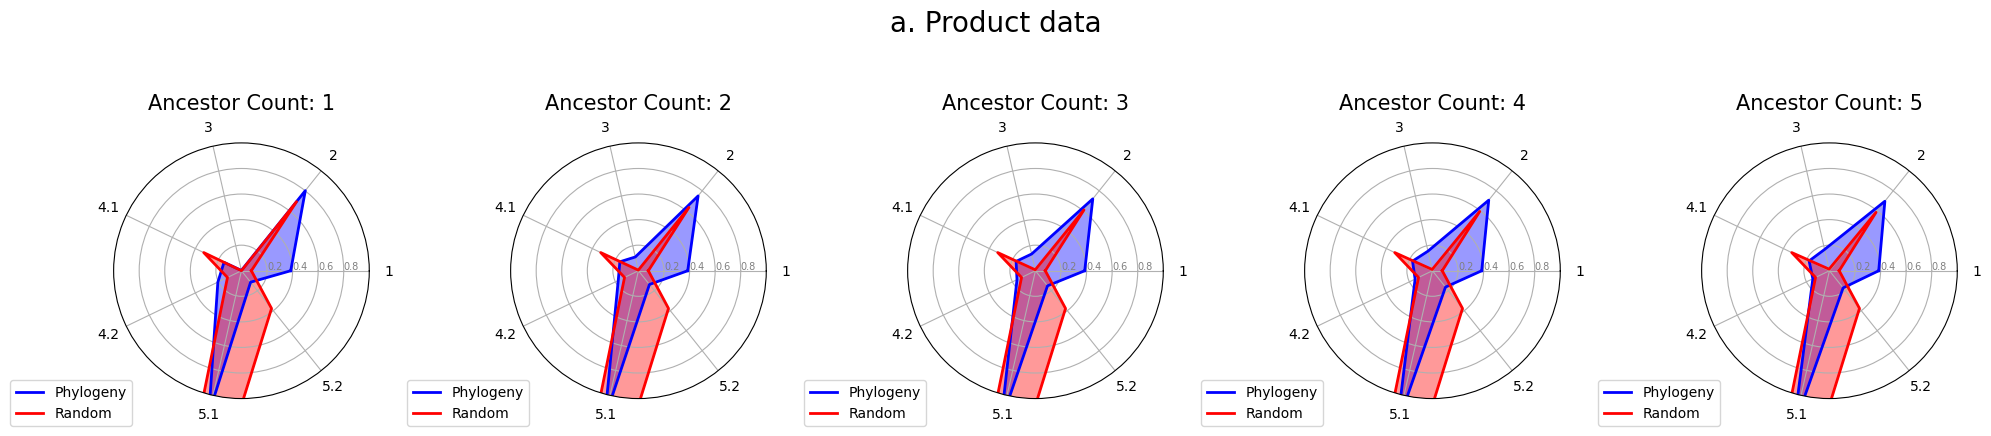

In [193]:
from math import pi

def plot_radar(df,title):
    # 获取唯一的 ancestor count 和 criteria
    ancestor_counts = df['ancestor count'].unique()
    criteria = df['criterion'].unique()

    # 定义颜色
    colors = ['b', 'r']
    
    # 创建图形和子图
    fig, axes = plt.subplots(1, len(ancestor_counts), figsize=(20, 8), subplot_kw={'polar': True})

    if len(ancestor_counts) == 1:
        axes = [axes]  # 保持axes为列表，便于后续处理
    fig.suptitle(title, size=20, y=.8)
    # 循环每个 ancestor count 绘制雷达图
    for ax, count in zip(axes, ancestor_counts):
        # 过滤当前 ancestor count 的数据
        data = df[df['ancestor count'] == count]

        # 变量数目
        num_vars = len(criteria)

        # 计算每个轴的角度
        angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
        angles += angles[:1]  # 闭合

        # 画每个轴并添加标签
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(criteria)

        # 画 y-label
        ax.set_rlabel_position(0)
        ax.set_yticks([0.2, 0.4, 0.6, 0.8])
        ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
        ax.set_ylim(0, 1)

        # 绘制 phy 数据
        values = data['phy'].tolist()
        values += values[:1]
        ax.plot(angles, values, color=colors[0], linewidth=2, linestyle='solid', label='Phylogeny')
        ax.fill(angles, values, color=colors[0], alpha=0.4)

        # 绘制 ran_mean 数据
        values = data['ran_mean'].tolist()
        values += values[:1]
        ax.plot(angles, values, color=colors[1], linewidth=2, linestyle='solid', label='Random')
        ax.fill(angles, values, color=colors[1], alpha=0.4)

        # 添加标题
        ax.set_title(f'Ancestor Count: {count}', size=15, color='black', y=1.1)

        # 添加图例
        ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # 调整布局
    plt.tight_layout()
    plt.savefig(path+'product_rada.png', bbox_inches='tight', dpi=300)
    plt.show()


plot_radar(comp_df,'a. Product data')